<a href="https://colab.research.google.com/github/Jurk06/data-driven-challenge/blob/master/Dengue5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
train=pd.read_csv('dengue_features_train.csv')

In [24]:
train.sample(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1211,iq,2005,41,2005-10-15,0.373429,0.277483,0.374229,0.352271,60.00,299.515714,...,22.20,75.508571,60.00,15.915714,11.685714,28.500000,11.800000,37.0,22.3,233.2
1247,iq,2006,25,2006-06-25,0.221380,0.223360,0.371417,0.221460,71.69,296.724286,...,27.29,88.471429,71.69,15.801429,10.785714,26.600000,10.350000,32.5,20.4,74.9
217,sj,1994,26,1994-07-02,0.125267,0.117650,0.123417,0.155186,12.67,299.861429,...,22.90,79.027143,12.67,17.228571,2.642857,28.400000,6.757143,32.8,23.9,10.2
145,sj,1993,6,1993-02-12,0.273800,0.055800,0.202086,0.204786,0.00,296.594286,...,14.30,79.825714,0.00,14.385714,2.342857,25.428571,6.742857,30.0,20.6,2.1
1086,iq,2003,21,2003-05-21,0.189257,0.166950,0.184300,0.170743,23.70,295.878571,...,34.56,95.854286,23.70,16.515714,6.757143,27.466667,8.900000,32.5,22.3,145.8


In [0]:
test=pd.read_csv('dengue_features_test.csv')

In [5]:
test.shape

(416, 24)

In [0]:
feat_train=pd.read_csv('dengue_labels_train.csv')

In [7]:
feat_train.shape

(1456, 4)

In [0]:
train.fillna(train.mean(), inplace=True)

In [0]:
test.fillna(train.mean(), inplace=True)

In [11]:
test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [0]:
import matplotlib.pyplot as plt

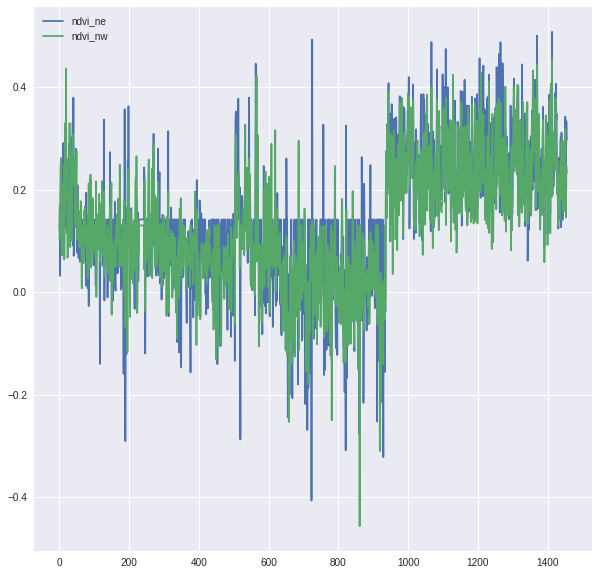

In [17]:
plt.figure(figsize=(10,10))
train['ndvi_ne'].plot()
train['ndvi_nw'].plot()
plt.legend()

In [0]:
df=pd.merge(train, feat_train)

In [19]:
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [0]:
c1=df[df['city']=='sj']

In [23]:
c1.shape

(936, 25)

In [0]:
c2=df[df['city']=='iq']

In [26]:
c2.shape

(520, 25)

In [30]:
c1['week_start_date']=pd.to_datetime(c1['week_start_date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
c1.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [32]:
%timeit pd.to_datetime(c1['week_start_date'], infer_datetime_format=True)

The slowest run took 17.42 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 72.9 µs per loop


In [33]:
c1.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [0]:
c1.set_index(c1['week_start_date'], inplace=True)

In [35]:
c1.shape

(936, 25)

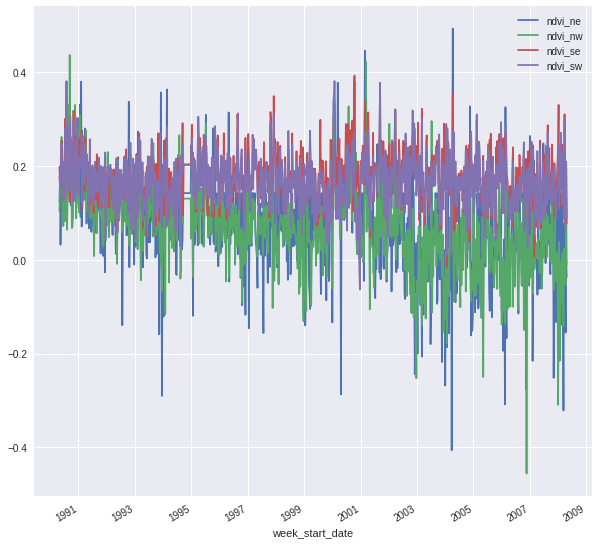

In [38]:
plt.figure(figsize=(10,10))
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.show()



In [41]:
%timeit pd.to_datetime(c2['week_start_date'], infer_datetime_format=True)

1000 loops, best of 3: 507 µs per loop


In [0]:
c2.set_index(c2['week_start_date'], inplace=True)

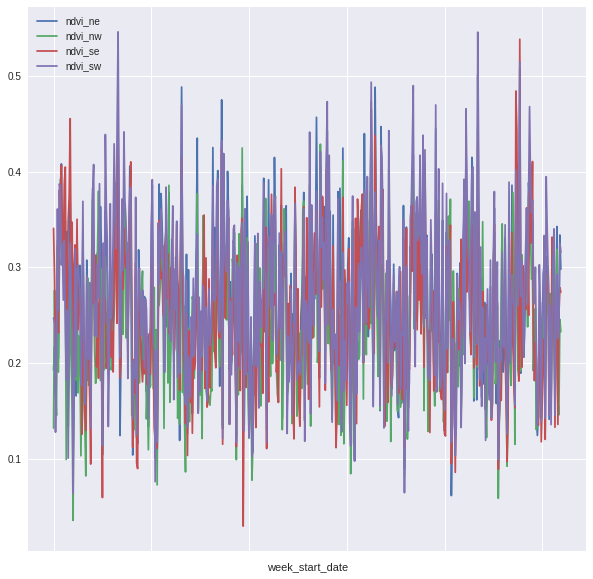

In [43]:
plt.figure(figsize=(10,10))
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()
plt.show()



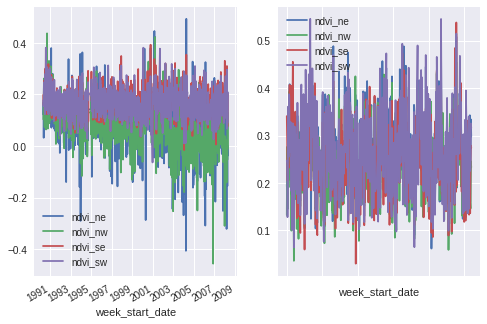

In [44]:
plt.subplot(1,2,1)
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()

In [47]:
%timeit pd.to_datetime(df['week_start_date'], infer_datetime_format=True)

1000 loops, best of 3: 716 µs per loop


In [49]:
c2['week_start_date']=pd.to_datetime(c2['week_start_date'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
c2.set_index(c2['week_start_date'], inplace=True)

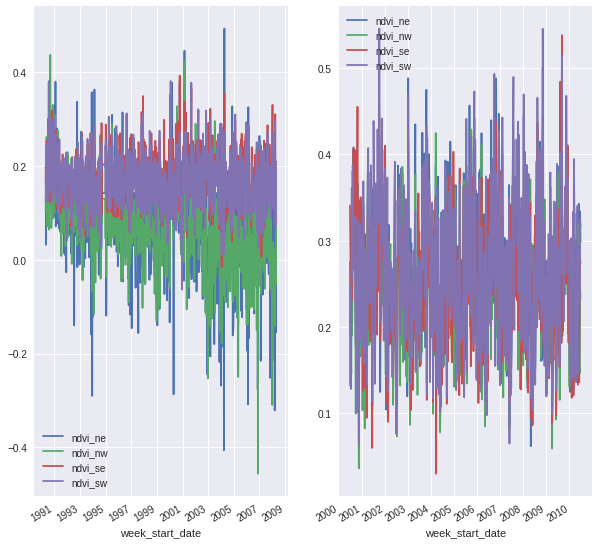

In [56]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
c1['ndvi_ne'].plot()
c1['ndvi_nw'].plot()
c1['ndvi_se'].plot()
c1['ndvi_sw'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['ndvi_ne'].plot()
c2['ndvi_nw'].plot()
c2['ndvi_se'].plot()
c2['ndvi_sw'].plot()
plt.legend()

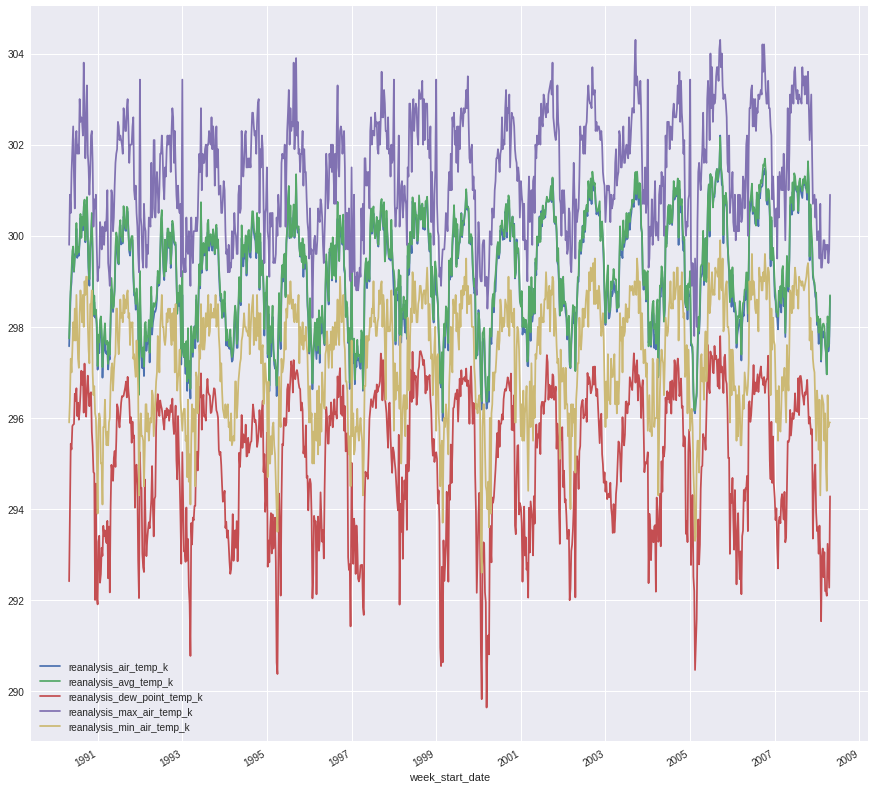

In [63]:
plt.figure(figsize=(15,15))
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()


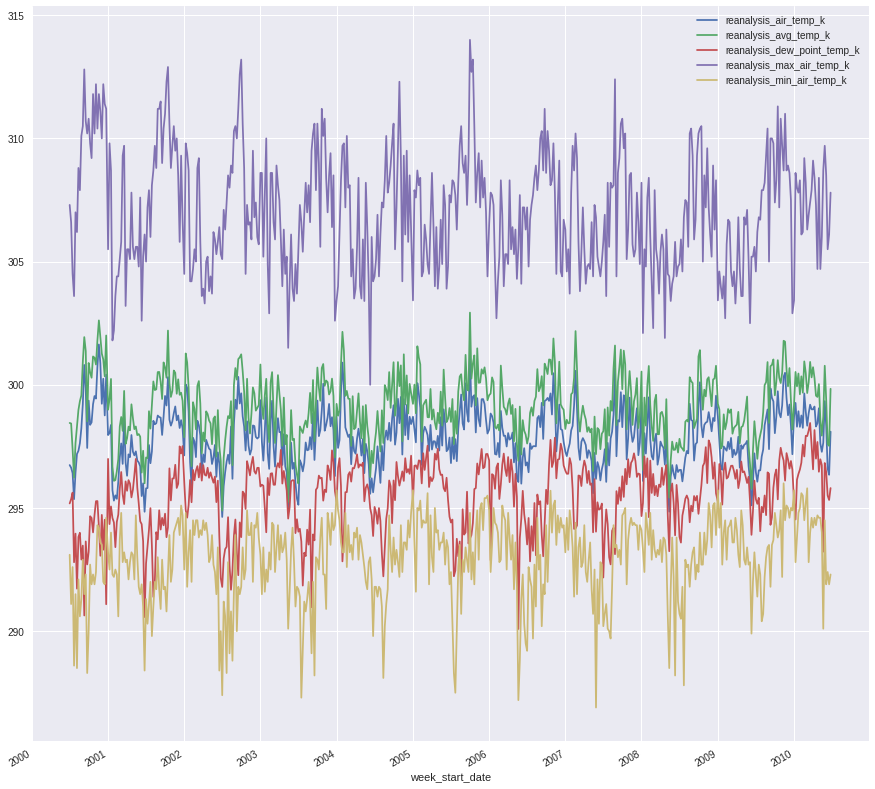

In [64]:
plt.figure(figsize=(15,15))
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

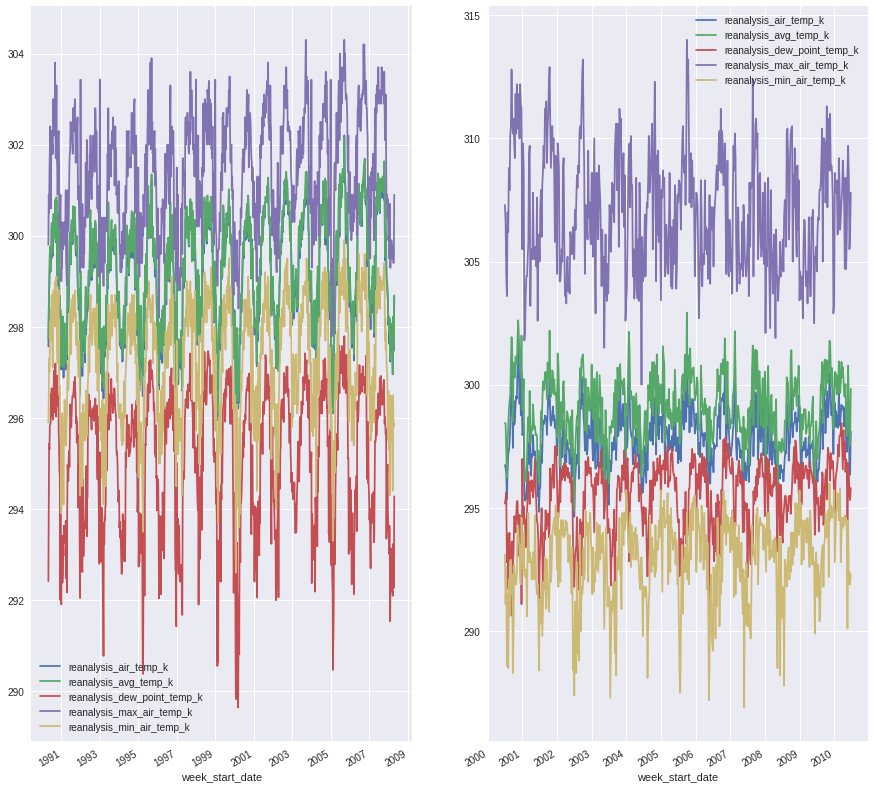

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
c1['reanalysis_air_temp_k'].plot()
c1['reanalysis_avg_temp_k'].plot()
c1['reanalysis_dew_point_temp_k'].plot()
c1['reanalysis_max_air_temp_k'].plot()
c1['reanalysis_min_air_temp_k'].plot()
plt.legend()
plt.subplot(1,2,2)
c2['reanalysis_air_temp_k'].plot()
c2['reanalysis_avg_temp_k'].plot()
c2['reanalysis_dew_point_temp_k'].plot()
c2['reanalysis_max_air_temp_k'].plot()
c2['reanalysis_min_air_temp_k'].plot()
plt.legend()

In [69]:
df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

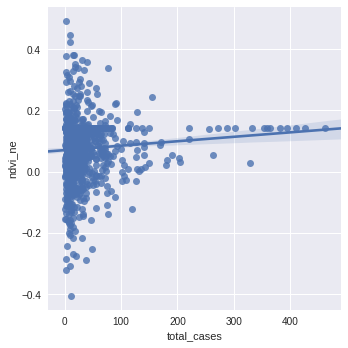

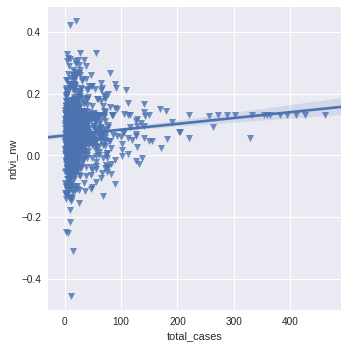

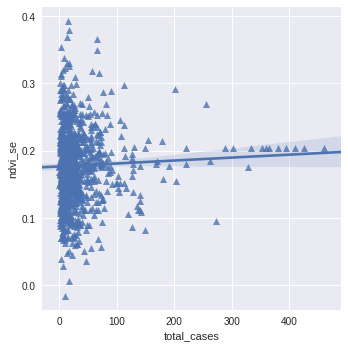

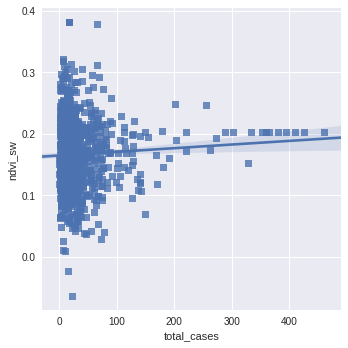

In [100]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=c1, markers='o')
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=c1, markers='v')
g=sns.lmplot(x='total_cases', y='ndvi_se', data=c1, markers='^')
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=c1, markers='s')

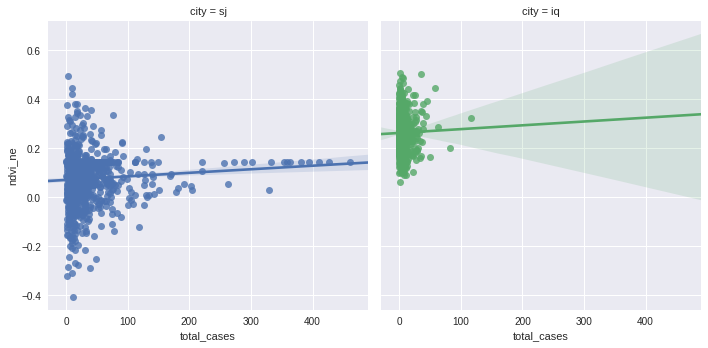

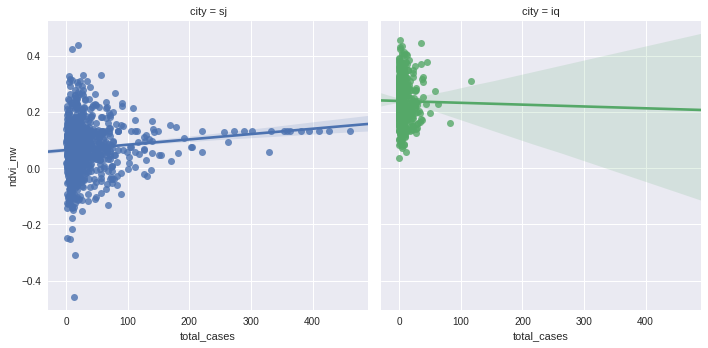

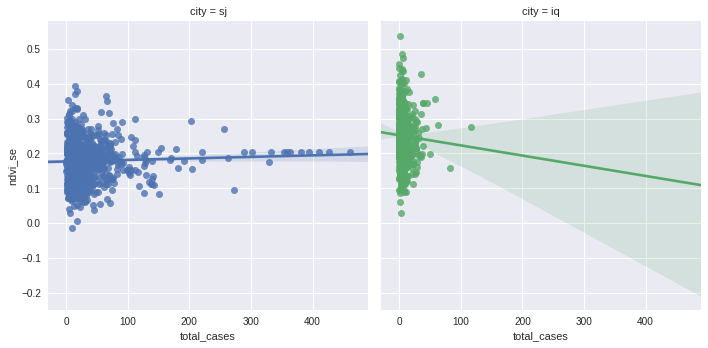

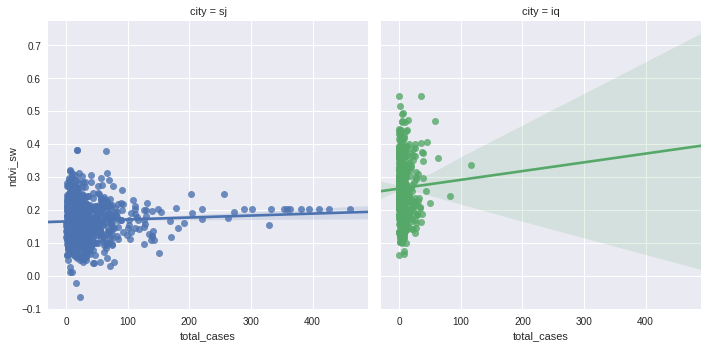

In [108]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='o', col='city', hue='city')
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='o', col='city', hue='city')


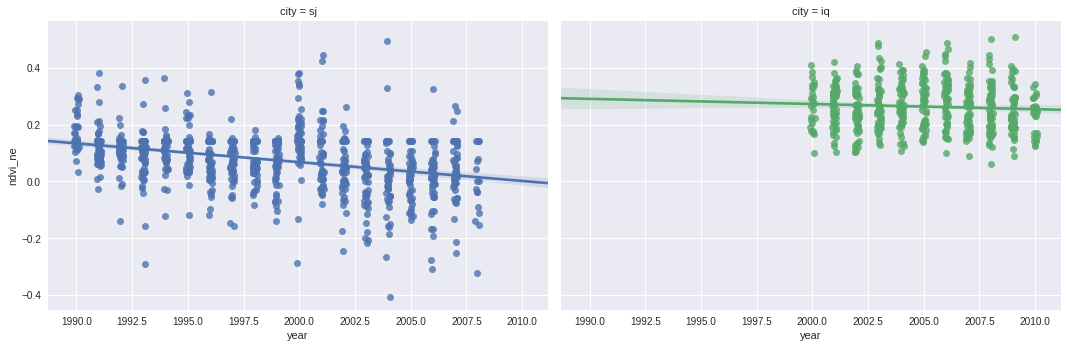

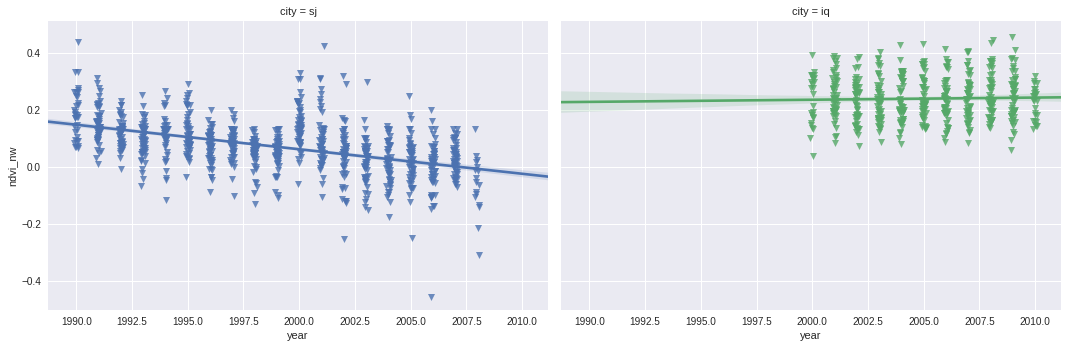

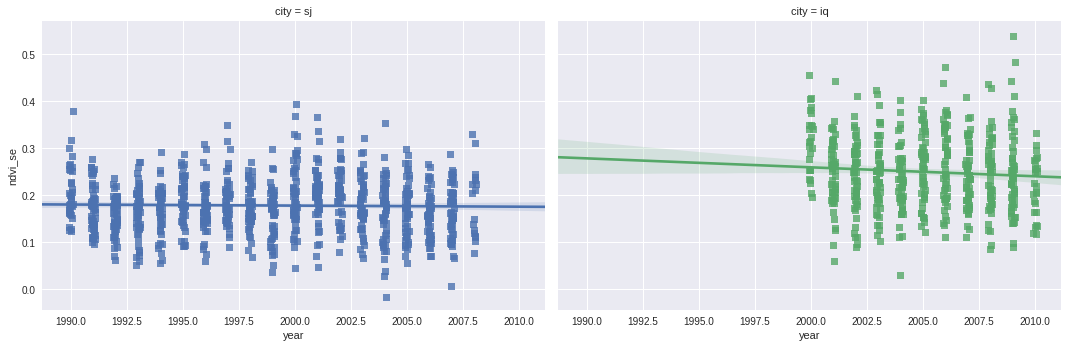

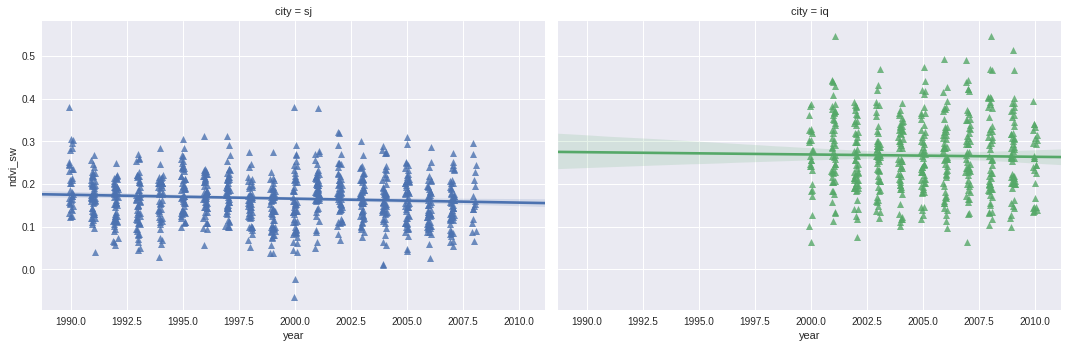

In [118]:
g=sns.lmplot(x='year', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


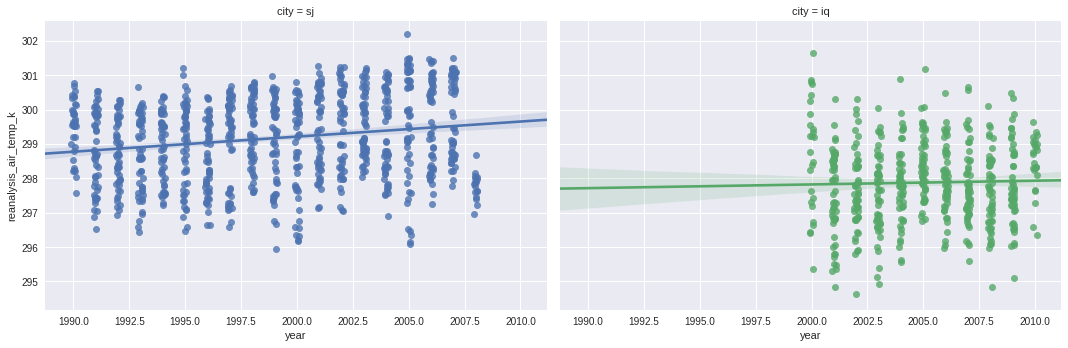

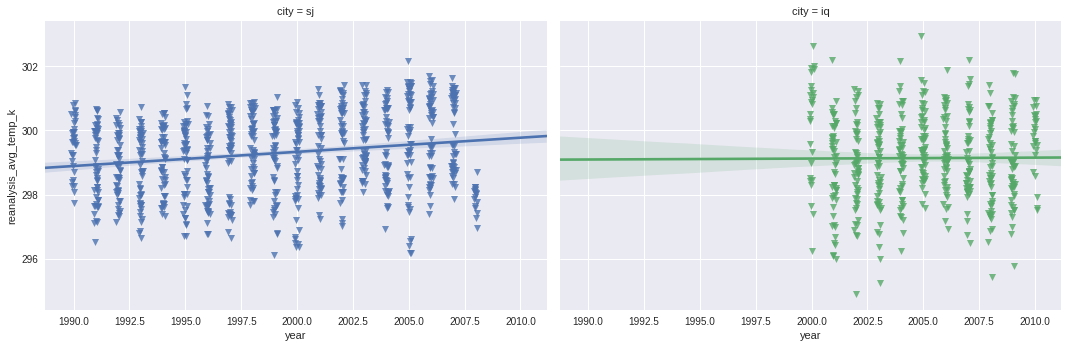

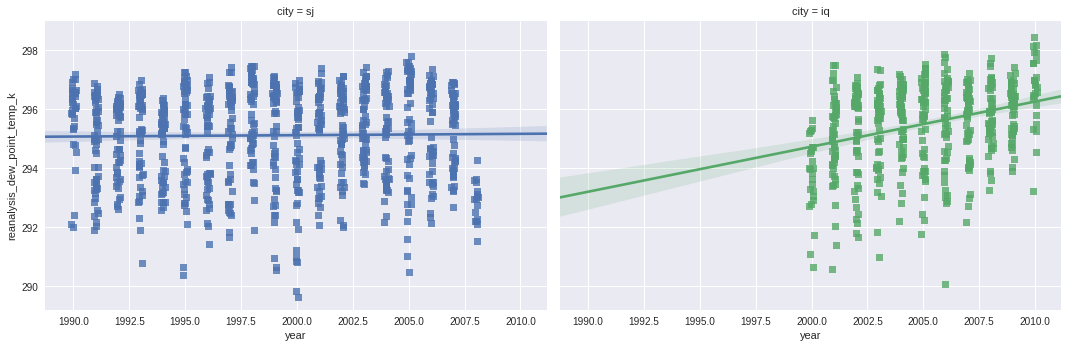

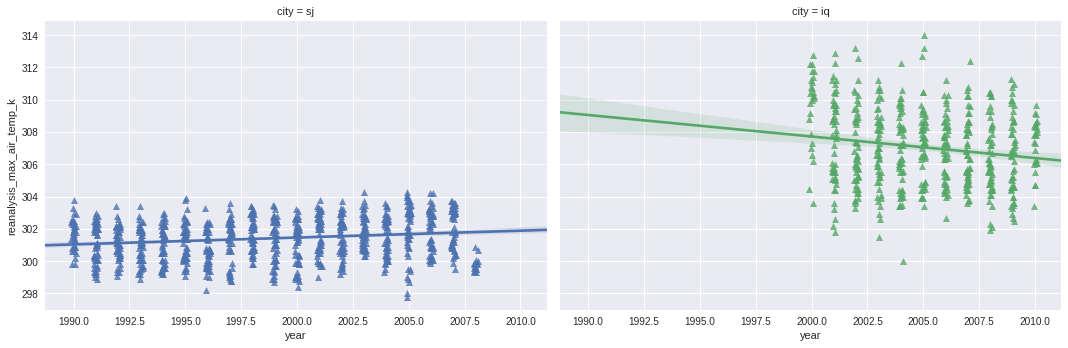

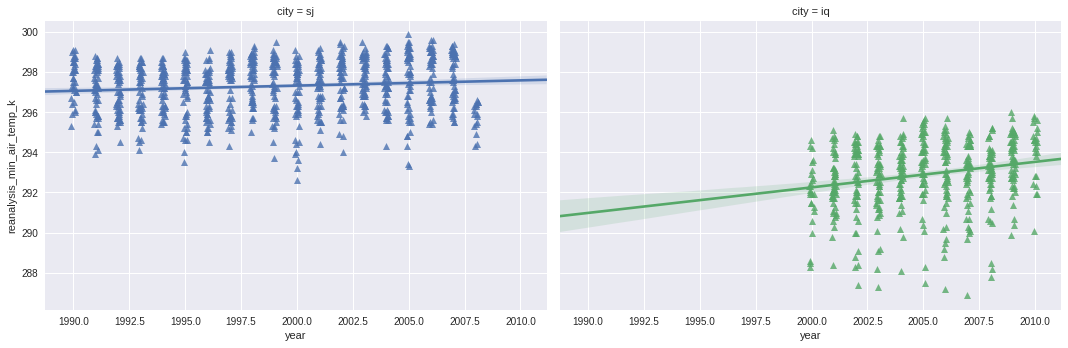

In [127]:
g=sns.lmplot(x='year', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


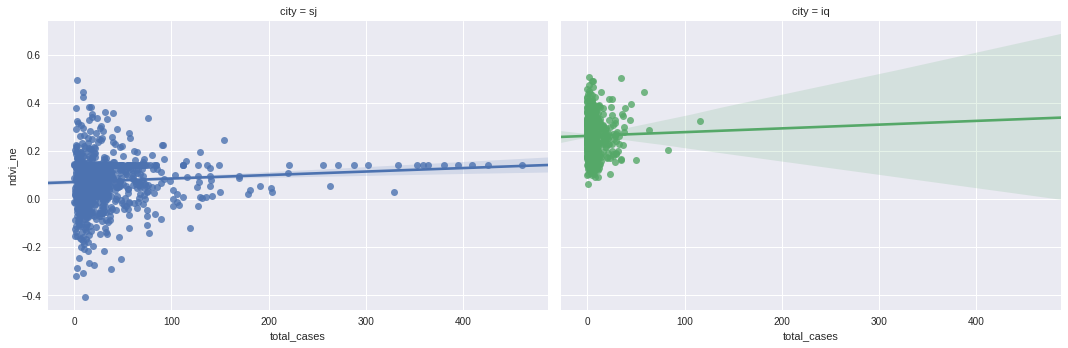

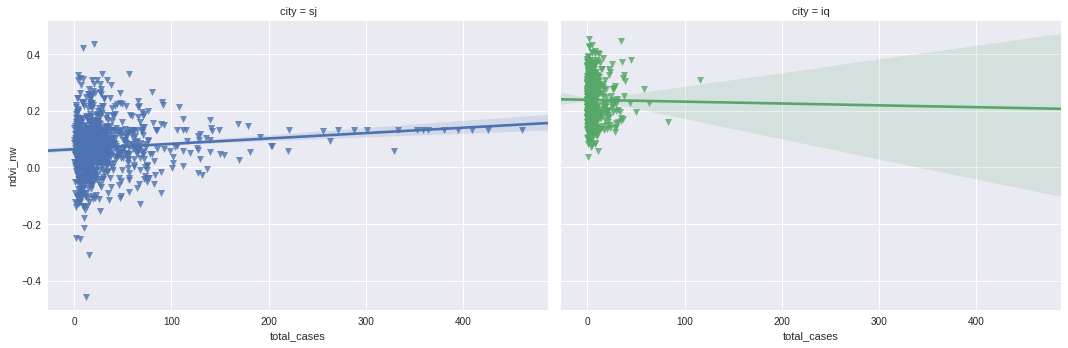

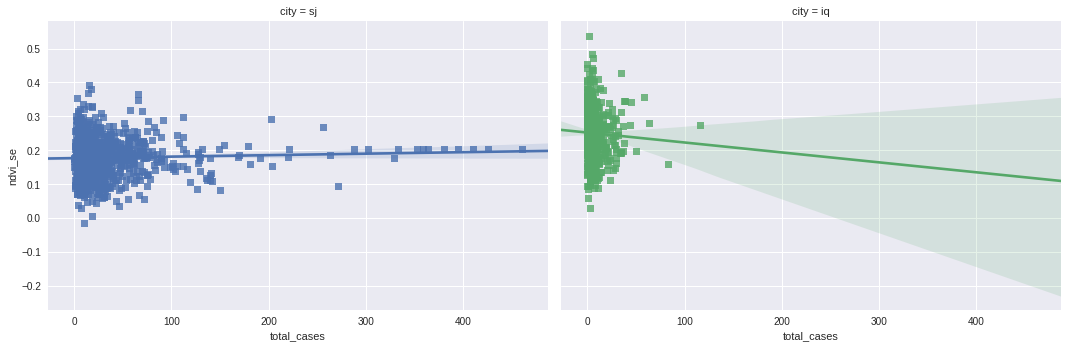

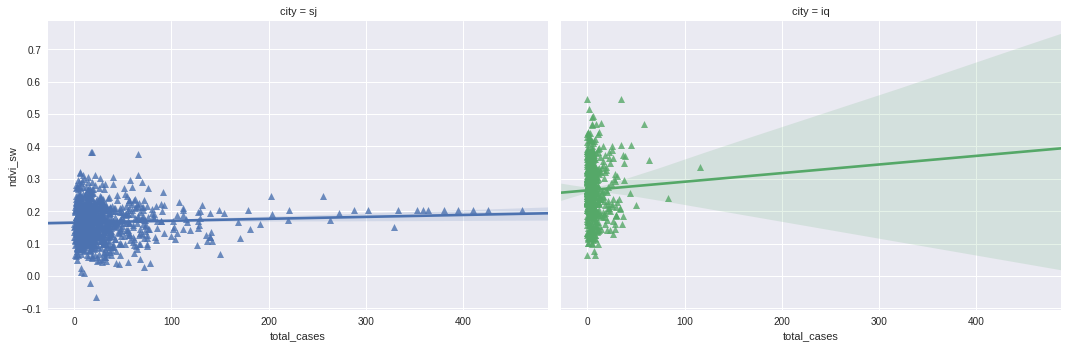

In [128]:
g=sns.lmplot(x='total_cases', y='ndvi_ne', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_nw', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_se', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='ndvi_sw', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


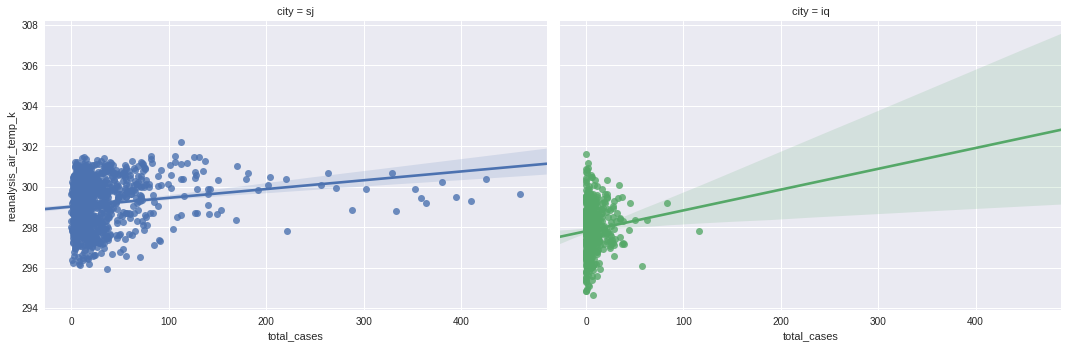

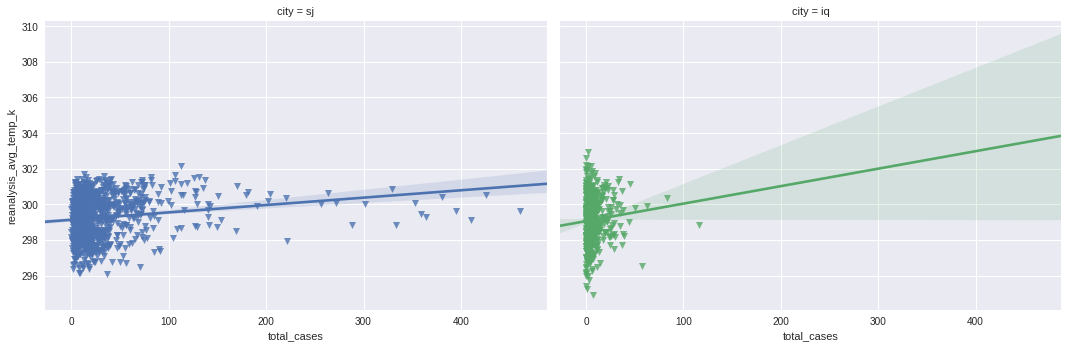

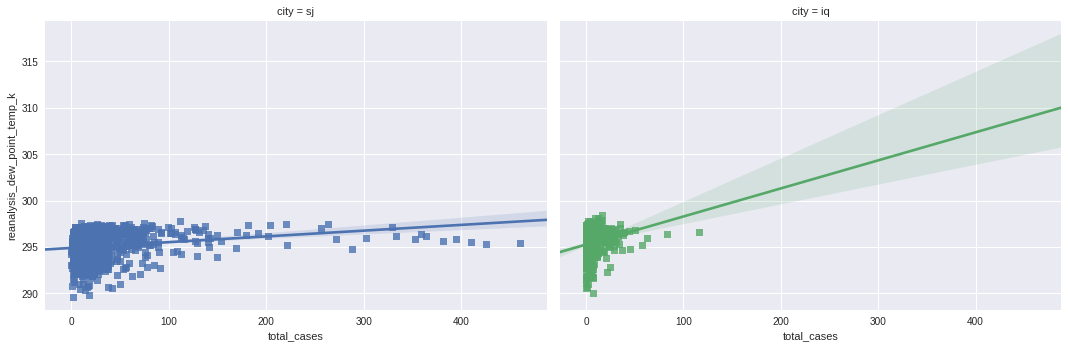

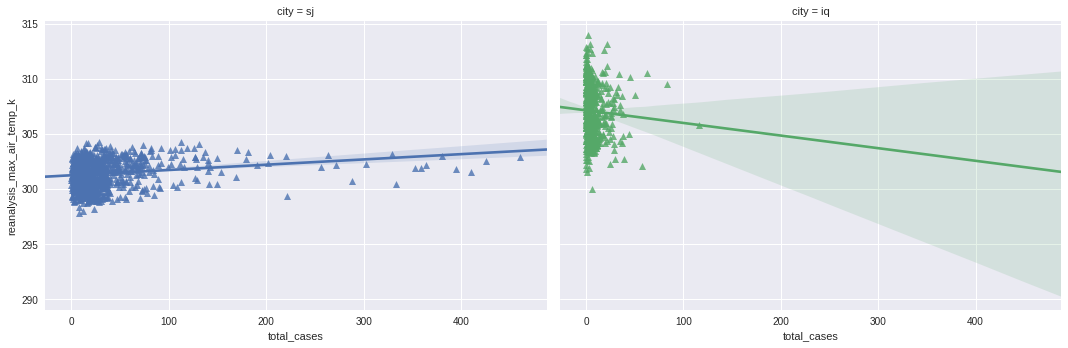

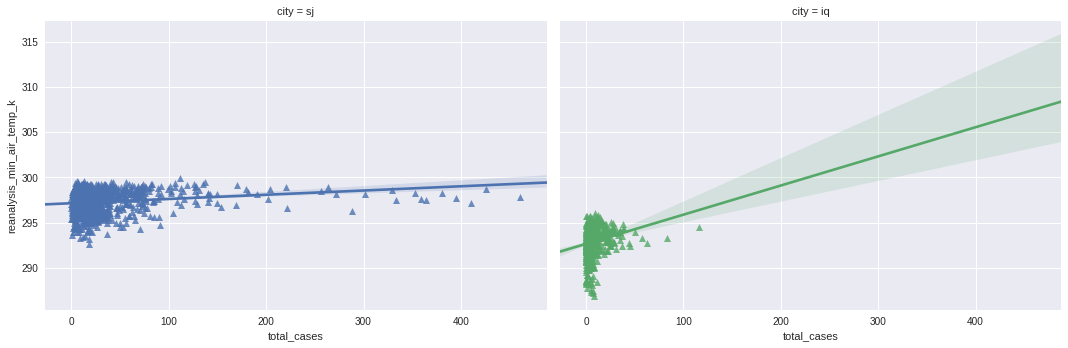

In [129]:
g=sns.lmplot(x='total_cases', y='reanalysis_air_temp_k', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_avg_temp_k', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_dew_point_temp_k', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_max_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_min_air_temp_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


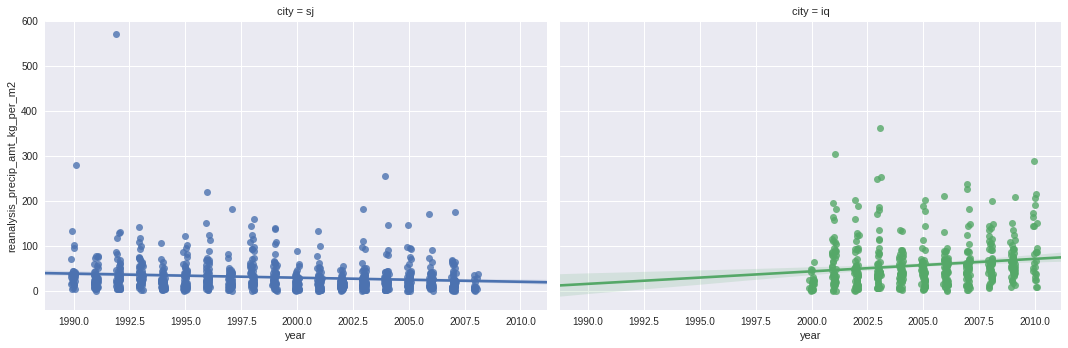

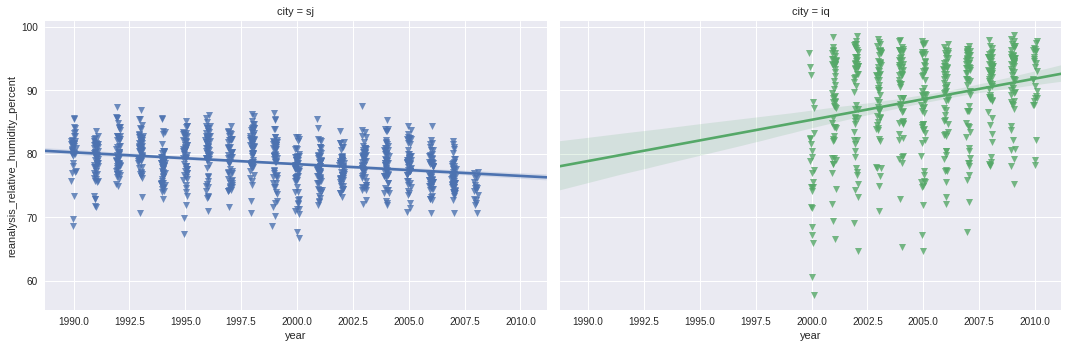

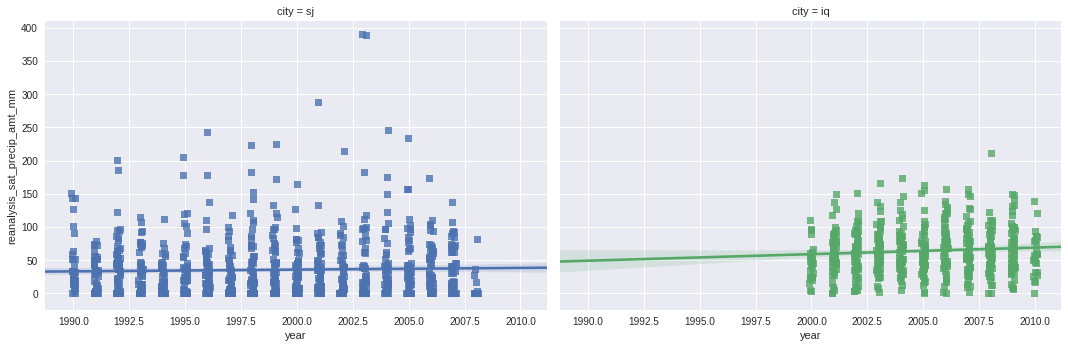

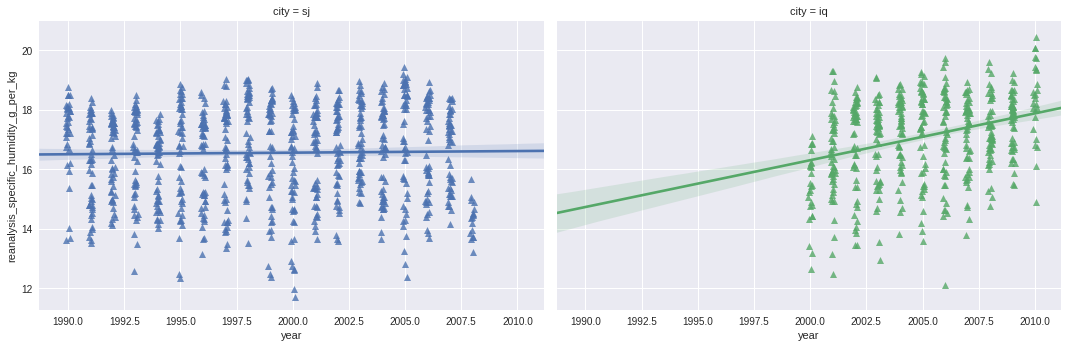

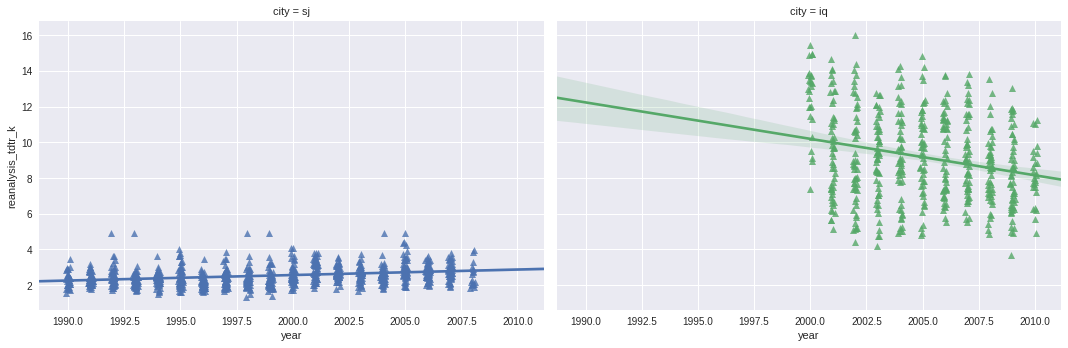

In [131]:
g=sns.lmplot(x='year', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


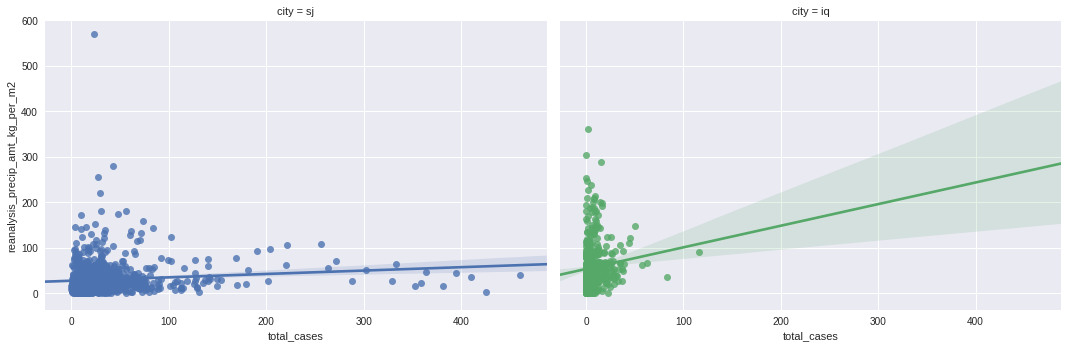

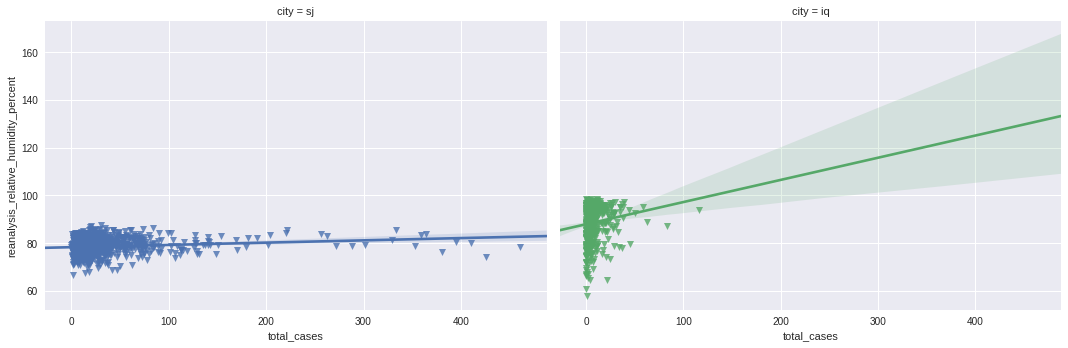

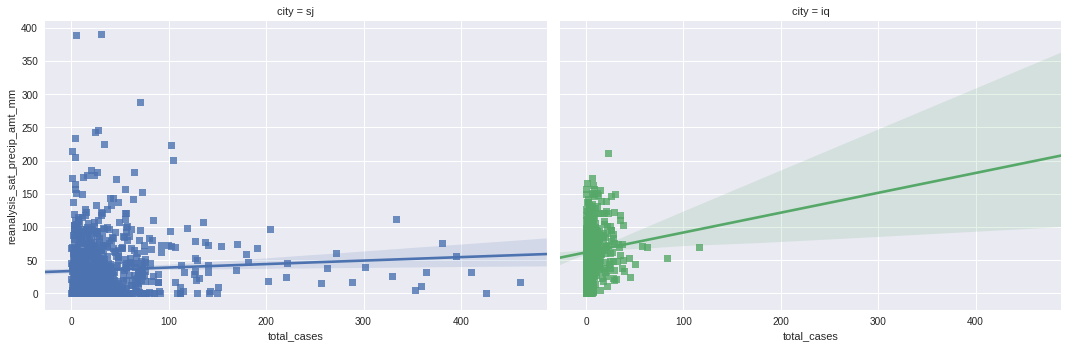

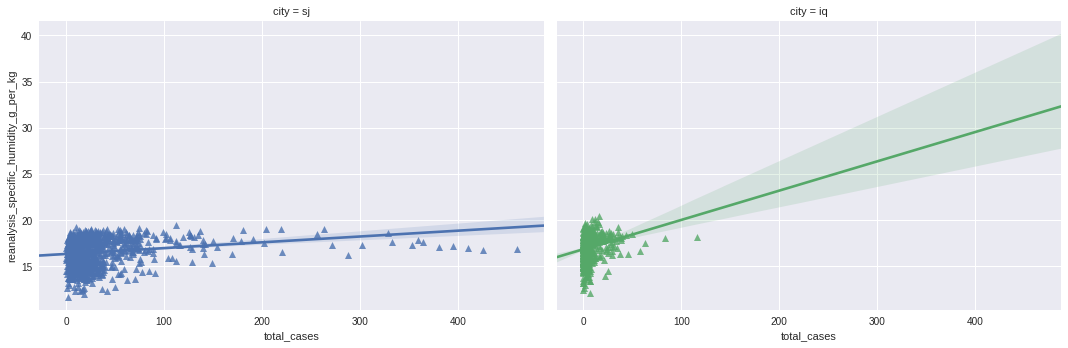

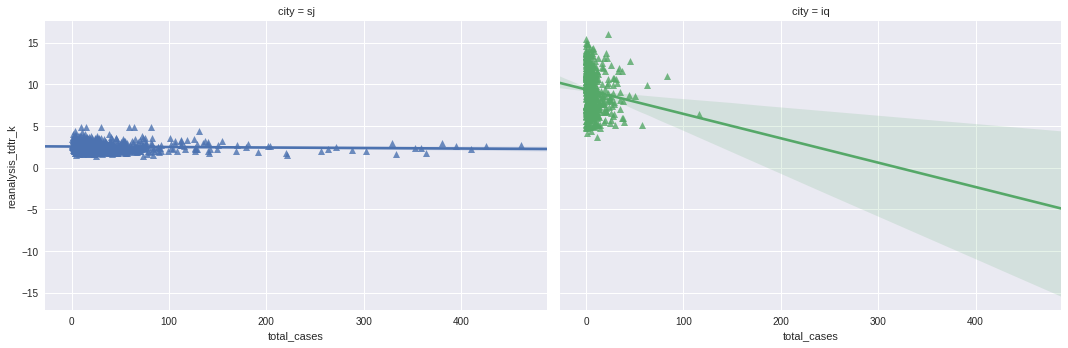

In [133]:
g=sns.lmplot(x='total_cases', y='reanalysis_precip_amt_kg_per_m2', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_relative_humidity_percent', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_sat_precip_amt_mm', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_specific_humidity_g_per_kg', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='reanalysis_tdtr_k', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


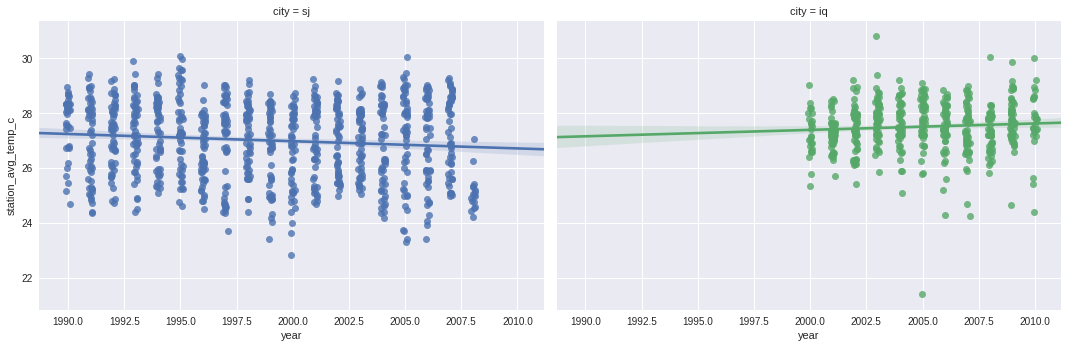

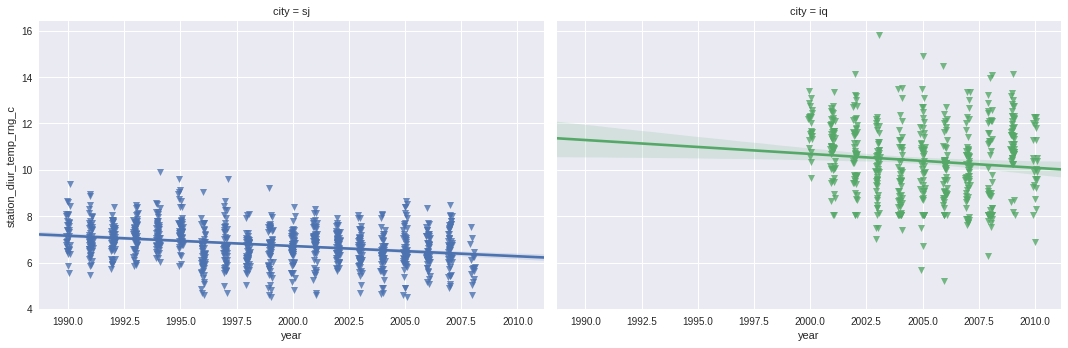

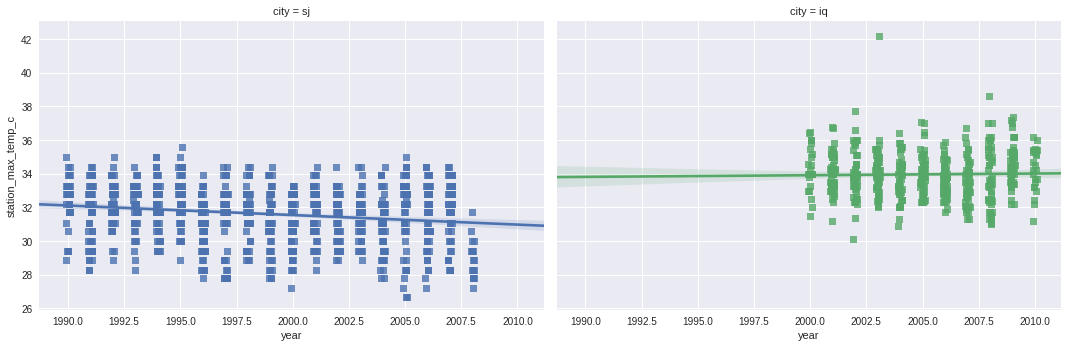

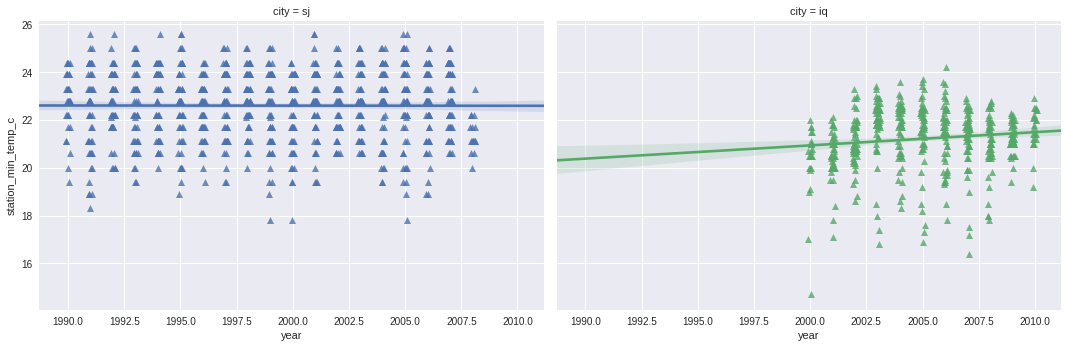

In [132]:
g=sns.lmplot(x='year', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='year', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


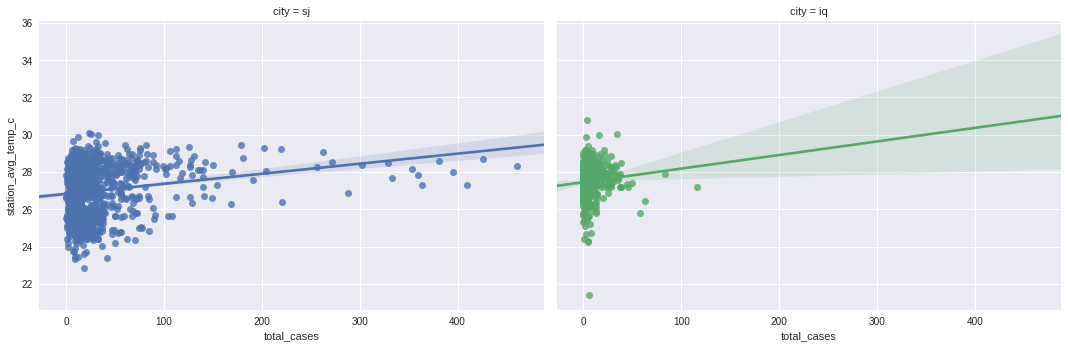

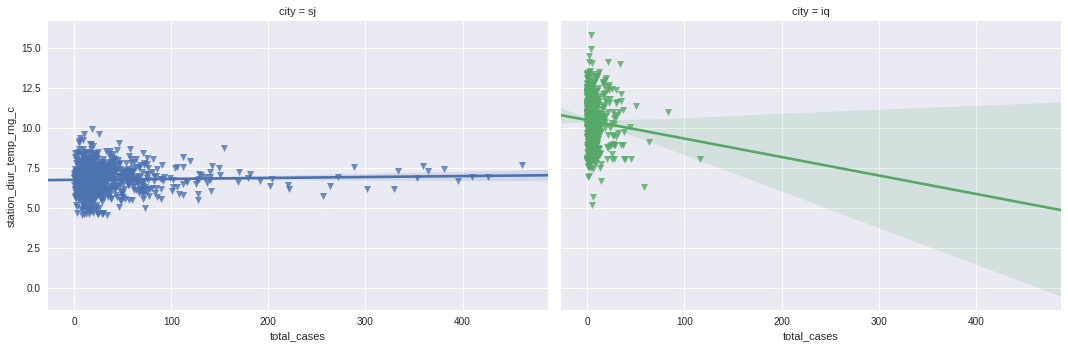

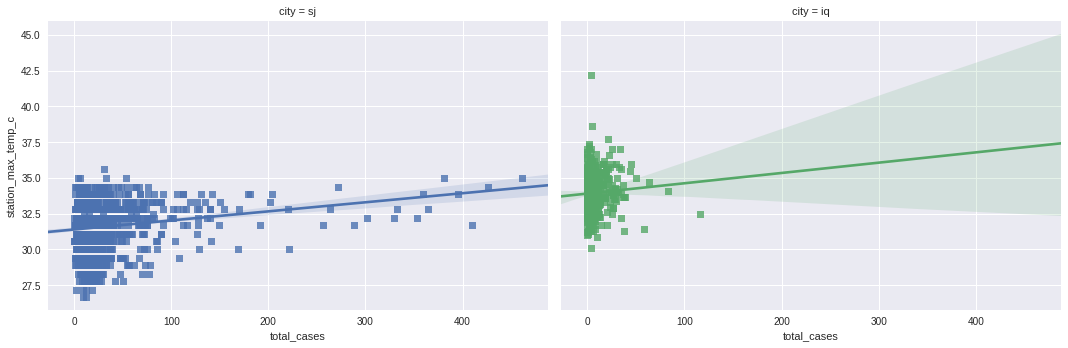

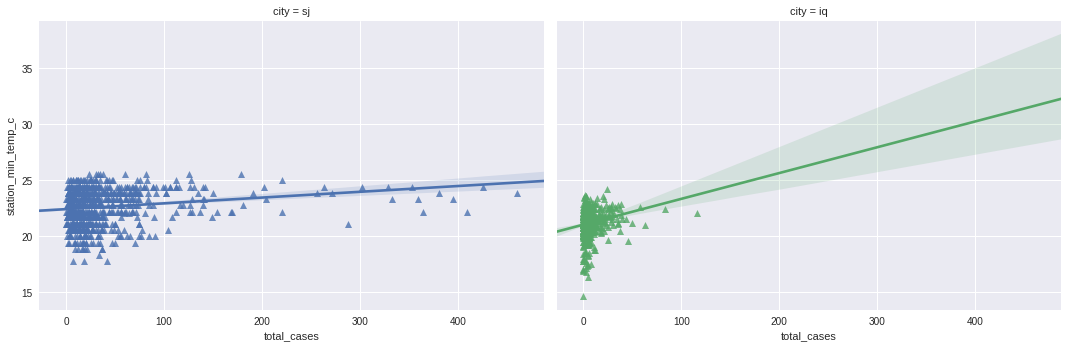

In [134]:
g=sns.lmplot(x='total_cases', y='station_avg_temp_c', data=df, markers='o', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_diur_temp_rng_c', data=df, markers='v', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_max_temp_c', data=df, markers='s', col='city', hue='city',aspect=1.5, x_jitter=.1)
g=sns.lmplot(x='total_cases', y='station_min_temp_c', data=df, markers='^', col='city', hue='city',aspect=1.5, x_jitter=.1)


In [0]:
feature_col=['city','week_start_date', 'total_cases','weekofyear']
X=df.drop(feature_col, axis=1)



In [136]:
X.shape

(1456, 21)

In [0]:
y=df.iloc[:,24]


In [139]:
y.shape

(1456,)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [142]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.09589041 0.03424658 0.08219178 0.08219178 0.08219178 0.05479452
 0.04137931 0.02758621 0.06206897 0.06896552]


In [143]:
np.mean(score)*100


6.315068493150686

In [144]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.08219178 0.06849315 0.0890411  0.06849315 0.05479452 0.10958904
 0.05517241 0.04827586 0.04827586 0.04827586]


In [145]:
np.mean(score)*100


6.726027397260273

In [146]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.06849315 0.10273973 0.07534247 0.10273973 0.07534247 0.08219178
 0.09655172 0.06896552 0.05517241 0.06206897]


In [147]:
np.mean(score)*100


7.896079357581483

In [148]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.07534247 0.08219178 0.04794521 0.06849315 0.04794521 0.09589041
 0.06206897 0.04827586 0.08965517 0.08275862]


In [149]:
np.mean(score)*100


7.005668398677374

In [150]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.08219178 0.07534247 0.06164384 0.06849315 0.06164384 0.0890411
 0.05517241 0.04827586 0.06896552 0.08965517]


In [151]:
np.mean(score)*100


7.00425129900803

In [152]:
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,0.130553,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,0.142294,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [0]:
feature_col=['city','week_start_date', 'weekofyear']
test=test.drop(feature_col, axis=1)

In [0]:
clf=SVC()
clf.fit(X, y)

pred=clf.predict(test)

In [0]:
submission = pd.DataFrame({
        "total": pred
})

submission.to_csv('submission_format.csv', index=False)

In [156]:
submission = pd.read_csv('submission_format.csv')
submission.head()

,total
0,0
1,0
2,0
3,5
4,0
